In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
human_data = pd.read_csv('input_csvs/human_phantasia_data.csv')
llm_data = pd.read_csv('input_csvs/llm_phantasia_data.csv')

In [3]:
human_data

,ResponseId,001 - Response,002 - Response,003 - Response,004 - Response,005 - Response,006 - Response,007 - Response,008 - Response,009 - Response,...,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_5vQ6Xf1WugueDND,NaN,NaN,NaN,NaN,two chairs,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid
1,R_6D6PBkrChss508l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid
2,R_53qZezuj1Aowmel,ladder,comb,NaN,bra,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,2. Vague and dim,2. Vague and dim,2. Vague and dim,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,2. Vague and dim
3,R_6hazd14Iv0vRJV7,two squares,NaN,key,NaN,NaN,NaN,NaN,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...","1. No image at all, you only 'know' that you a...",4. Clear and reasonably vivid,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision
4,R_5KpdGyLKCFDJS5r,NaN,NaN,NaN,NaN,NaN,House,NaN,Butterfly,Mountain,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,2. Vague and dim,5. Perfectly clear and as vivid as normal vision,"1. No image at all, you only 'know' that you a...",5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,4. Clear and reasonably vivid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,ladder,NaN,NaN,NaN,NaN,NaN,tree,NaN,NaN,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,5. Perfectly clear and as vivid as normal vision,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid
96,R_1paSSMOwVWpJyn2,NaN,NaN,glasses,NaN,NaN,NaN,NaN,bow tie,NaN,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,3. Moderately clear and vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid
97,R_7NhDTJ2fxewY5qh,NaN,Ladder,Circles,NaN,NaN,NaN,NaN,NaN,Butterfly,...,4. Clear and reasonably vivid,4. Clear and reasonably vivid,2. Vague and dim,3. Moderately clear and vivid,4. Clear and reasonably vivid,4. Clear and reasonably vivid,3. Moderately clear and vivid,4. Clear and reasonably vivid,5. Perfectly clear and as vivid as normal vision,3. Moderately clear and vivid
98,R_5RvyCf53JoQh7Eg,NaN,Ladder,NaN,No idea,The same as previous question,hourglass,Arrow,NaN,Butterfly,...,5. Perfectly clear and as vivid as normal vision,5. Perfectly cle

In [4]:
llm_data

,Model,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,59,58,57,56,55,...,38,39,40,41,42,43,44,45,46,47
0,NaN,Definitely Incorrect,Possibly Correct,Definitely Correct,Finke Correct,"Pine Tree, Road Sign",Umbrella,Hourglass,Clock,"Yield Sign, Martini Glass",...,"Ice Cream, Club Symbol","Ice Cream, Clubs Symbol",Mug,Mug,Window,Mouse,Computer Mouse,"Clock, Compass",Lightbulb or Ice Cream,Computer Mouse
1,Gemini 2.0 Flash Multiple Context (2025-07-21),37,7,16,2,Arrowhead.,Hanging scale.,Tilted hashtag.,Partial logo.,Arrowhead.,...,Snowman face,Love knot.,Keyhole outline,Paperclip holder,Grid pattern.,Snake donut.,Swan logo,Hanging target.,Hourglass figure.,Dollar sign.
2,Gemini 2.0 Flash Single Context (2025-07-21),38,8,14,2,House roof,Fishing hook,Windmill blades,Balloon string,Christmas tree,...,Snowman face,Bow tie,Tuning fork,Paper clip,Hashtag symbol,Snake charmer,Swan neck,Fishing pole,Yin yang,Teapot spout
3,Gemini 2.0 Flash Image Generation Multiple Con...,44,5,11,2,Simple house,Stylized monogram,Tilted letter.,Partial clock,Road sign,...,Ice cream,Pair of glasses,"Backwards ""F"" and ""P""",Stylized initial.,Stylized letter.,Computer mouse,Stylized logo,Overlapping letters,Overlapping fives.,Abstract logo.
4,Gemini 2.5 Pro Multiple Context (2025-07-21),30,9,17,6,An arrow.,An anchor.,Letter Z.,Verified icon.,Planted sword.,...,Club symbol.,Stylized Owl,Letter B,Shopping cart.,Window pane.,Royal scepter.,Coffee cup.,Sitting person.,Anchor Chalice.,Ornate key.
5,Gemini 2.5 Pro Single Context (2025-07-21),31,10,19,3,Up arrow,Anchor,Hourglass,Checkmark icon,Spade symbol,...,Gift bow,Gift bow,Letter R,Letter R,Bookshelf,Cartoon bomb,Smoking pipe,Magnifying glass,Heart shape,House key
6,OpenAI o3 Multiple Context w/ Images (2025-07-14),10,8,33,5,House,Umbrella,Capital Z,letter k,Down arrow,...,Shamrock,Owl face,Coffee mug,Door,Grid,Power button,Dollar sign,Magnifying glass,Number eight,Dollar sign
7,OpenAI o3 Multiple Context (2025-07-21),18,6,35,9,Arrow,Umbrella,Hourglass,Registered trademark,Martini glass,...,Club suit,Club suit,Coffee mug,coffee mug,Tic-tac-toe,Power button,Lollipop,Skeleton key,Hourglass,Asclepius rod
8,OpenAI o3 Single Context (2025-07-21),17,4,39,5,tree,umbrella,bow tie,clock,martini glass,...,club,club,coffee mug,coffee mug,waffle,yo-yo,hot soup,wheelchair,window,anchor
9,OpenAI o3 Pro Multiple Context (2025-07-21),12,5,42,9,Christmas tree,Umbrella,Scissor jack,lowercase r,Martini glass,...,club symbol,club symbol,Coffee mug,Coffee mug,Tic-tac-toe,Power symbol,Magnifying glass,Magnifying glass,digit eight,Treble clef


In [5]:
crowdsourced_data = pd.read_csv('input_csvs/human_response_ranking_data.csv')
crowdsourced_data

,ResponseId,UserLanguage,Q1,PID,Metainfo_Browser,Metainfo_Version,Metainfo_Operating System,Metainfo_Resolution,Instructions Diamond,Instructions Vs,...,b60_q1374_house,b60_q1375_hut,b60_q1376_party hat,b60_q1377_roof,b60_q1378_television,b60_q1379_trapezium,b60_q1380_TV,Age,Gender,Language
0,R_7yOFgP0c0Kfd8aZ,EN,Accept,62e05a40c77214b0772d5596,Edge,138.0.0.0,Windows NT 10.0,1600x900,Completely,Moderatly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,female,english
1,R_5yrOnDogUCzSTjL,EN,Accept,5dda9b9a9d9e30a06d320ffb,Edge,138.0.0.0,Windows NT 10.0,1360x768,Completely,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,Male,English
2,R_3jZ1B5pAuPBnE0S,EN,Accept,65ca9c729a13f898ae374552,Chrome,122.0.0.0,Macintosh,1284x605,A lot,Completely,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37,Female,English
3,R_7axyHC8c9d19RTG,EN,Accept,6734c699d11234d19b0be0ec,Chrome,138.0.0.0,Windows NT 10.0,1920x1080,Moderately,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,Male,English
4,R_1zrZGpupYQtYXYJ,EN,Accept,669327c8eb71f9a6ca83eaab,Chrome,125.0.0.0,Macintosh,1440x900,Completely,Moderatly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Male,English
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,R_5EEVwPAGKC7UsSL,EN,Accept,6738bbb49b751f21694bb4af,Chrome,138.0.0.0,Windows NT 10.0,1280x720,A lot,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,Woman,English
274,R_15x8SJt8vE97tVT,EN,Accept,6604664cb53a76971c8a1dce,Chrome,137.0.0.0,Macintosh,1920x1080,A lot,Moderatly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,male,english
275,R_6MyV7x3J9zIxLEd,EN,Accept,605220735560745cf0a16a80,Firefox,141,Windows NT 10.0,1536x864,Completely,A lot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,f,English
276,R_6PCYPS1TSISKRdD,EN,Accept,62fdd0e557fbc97b30b32ae3,Chrome,138.0.0.0,Macintosh,1440x900,A lot,A little,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,male,english


In [6]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse spaces; '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)

def parse_block(header: str) -> int | None:
    """
    Extract leading block number 1..60 from a column header.
    Accepts leading zeros and trailing text.
    """
    m = re.match(r'^\s*0*(\d+)', str(header))
    if not m:
        return None
    b = int(m.group(1))
    return b if 1 <= b <= 60 else None

# 1) Tidy Crowdsourced Data CSV

In [7]:
# Column regex
# Pattern like: b12_q345_label text
_COL_RE = re.compile(r'^(b\d+)_q(\d+)_([\s\S]+)$', re.IGNORECASE)

# Map text responses to numeric scale
TEXT_MAP = {
    "not at all": 1,
    "a little": 2,
    "moderately": 3,
    "a lot": 4,
    "completely": 5,
}

In [8]:
def _to_score(value: str) -> int | None:
    """
    Convert a text response to a numeric score 1..5.
    """
    if value is None:
        return None
    s = str(value).strip()
    if s == "" or s.lower() in {"na", "nan"}:
        return None
    m = re.match(r'^\s*(\d+)', s)
    if m:
        try:
            n = int(m.group(1))
            if 1 <= n <= 5:
                return n
        except ValueError:
            pass
    key = re.sub(r'^\d+\s*[\.\-:]\s*', '', s).lower().strip()
    return TEXT_MAP.get(key, None)

In [9]:
def identify_block_columns(df: pd.DataFrame) -> list:
    """

    :param df:
    :return:
    """

    # Identify block columns in order
    block_cols = []
    for idx, c in enumerate(df.columns):
        m = _COL_RE.match(c)
        if m:
            b, qid, label = m.groups()
            block_cols.append((idx, c, b, qid, label))
    return block_cols

In [10]:
def sort_blocks(block_cols: list) -> dict:
    """
    Sort blocks columns by block id in original position
    :param block_cols:
    :return:
    """
    by_block = {}
    for idx, c, b, qid, label in block_cols:
        by_block.setdefault(b, []).append((idx, c, qid, label))
    for b in by_block:
        by_block[b].sort(key=lambda t: t[0])
    return by_block

In [11]:
def iterate_over_blocks(row, block, resp_id):
    rows = []
    for b, items in block.items():
        repeat = 0
        for _, col, qid, label in items:
            raw = row.get(col, "") # if the current cell is blank, respondent did not answer so move to next
            score = _to_score(raw) # convert textual score to numberic
            if score is None:
                continue
            repeat += 1
            mnum = re.match(r'^b(\d+)$', b, re.IGNORECASE)
            block_num = int(mnum.group(1)) if mnum else None
            rows.append({
                "ResponseId": resp_id,
                "block": b,
                "block_num": block_num,
                "repeat_index": repeat,
                "qid": qid,
                "label": label,
                "score": score,
                "raw": raw,
            })
    return rows

In [12]:
def iterate_over_responses(by_block, df):
    """
    Iterate over each response
    :param by_block:
    :param df:
    :return:
    """
    rows = []
    for _, r in df.iterrows():
        resp_id = r.get("ResponseId")
        rows += iterate_over_blocks(r, by_block, resp_id)

    out = pd.DataFrame(rows)
    if not out.empty:
        out["repeat_index"] = pd.to_numeric(out["repeat_index"], errors="coerce")
        out = out.sort_values(by=["ResponseId","block_num","repeat_index"],
                              ascending=[True,True,True], na_position="last").reset_index(drop=True)
    return out

In [13]:
def tidy_block_scores(df) -> pd.DataFrame:
    block_cols = identify_block_columns(df)
    by_block = sort_blocks(block_cols)
    return iterate_over_responses(by_block, df)

In [14]:
tidy_crowdsourced_data = tidy_block_scores(crowdsourced_data)
tidy_crowdsourced_data

,ResponseId,block,block_num,repeat_index,qid,label,score,raw
0,R_10qMKOFXS2FbriN,b2,2,1,8,H,2,A little
1,R_10qMKOFXS2FbriN,b3,3,1,28,doorway,1,Not at all
2,R_10qMKOFXS2FbriN,b4,4,1,56,music notes,5,Completely
3,R_10qMKOFXS2FbriN,b4,4,2,59,spectacles,1,Not at all
4,R_10qMKOFXS2FbriN,b10,10,1,146,cyrillic letter,5,Completely
...,...,...,...,...,...,...,...,...
8335,R_7yOFgP0c0Kfd8aZ,b47,47,2,1118,musical clef,1,Not at all
8336,R_7yOFgP0c0Kfd8aZ,b53,53,1,1243,Boat,5,Completely
8337,R_7yOFgP0c0Kfd8aZ,b53,53,2,1251,musical note,1,Not at all
8338,R_7yOFgP0c0Kfd8aZ,b56,56,1,1316,verified icon,1,Not at all


In [15]:
tidy_crowdsourced_data.to_csv("output_csvs/tidy_crowdsourced_data.csv")

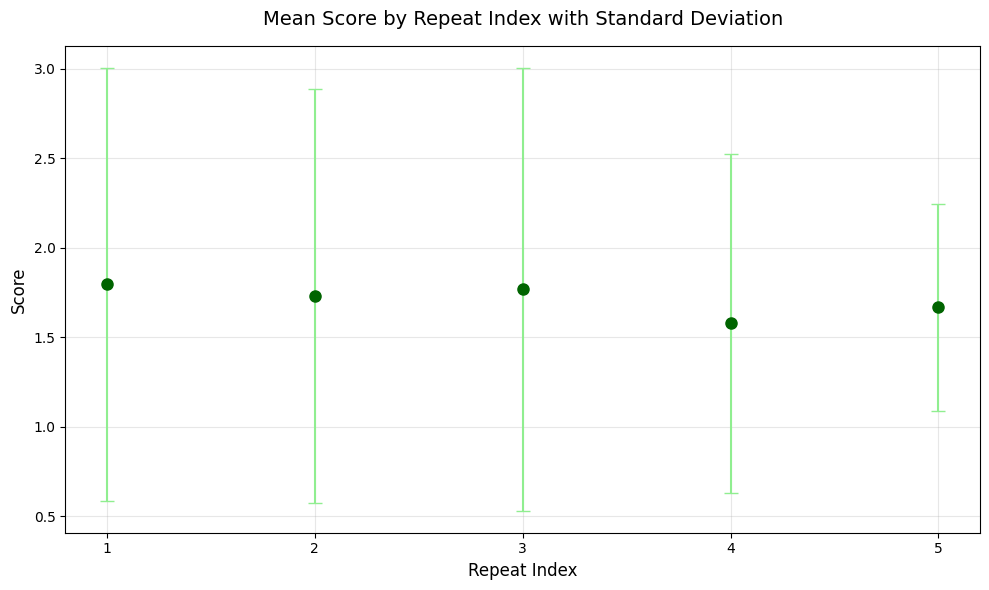

In [16]:
repeat_scores = tidy_crowdsourced_data.groupby('repeat_index')['score'].agg(['mean', 'std'])

plt.figure(figsize=(10,6))
plt.errorbar(repeat_scores.index, repeat_scores['mean'],
            yerr=repeat_scores['std'], fmt='o', capsize=5,
            color='darkgreen', ecolor='lightgreen', markersize=8)
plt.title('Mean Score by Repeat Index with Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Repeat Index', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1,6))
plt.tight_layout()
plt.show()

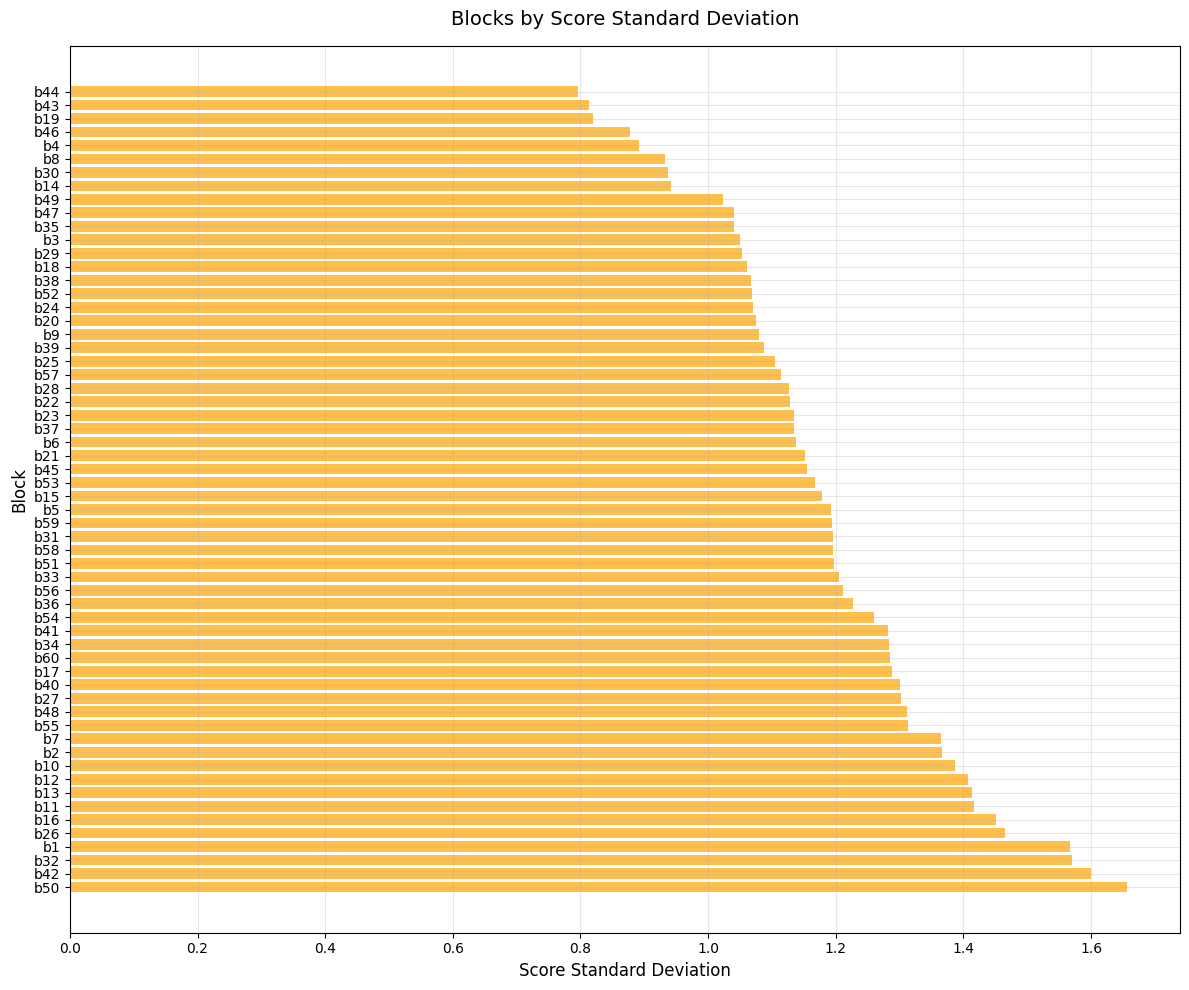

In [17]:
score_std = tidy_crowdsourced_data.groupby('block')['score'].std()
sorted_std = score_std.sort_values(ascending=False)

plt.figure(figsize=(12,10))
plt.barh(range(len(sorted_std)), sorted_std.values, color='orange', alpha=0.7)
plt.title('Blocks by Score Standard Deviation', fontsize=14, pad=15)
plt.xlabel('Score Standard Deviation', fontsize=12)
plt.ylabel('Block', fontsize=12)
plt.yticks(range(len(sorted_std)), sorted_std.index)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

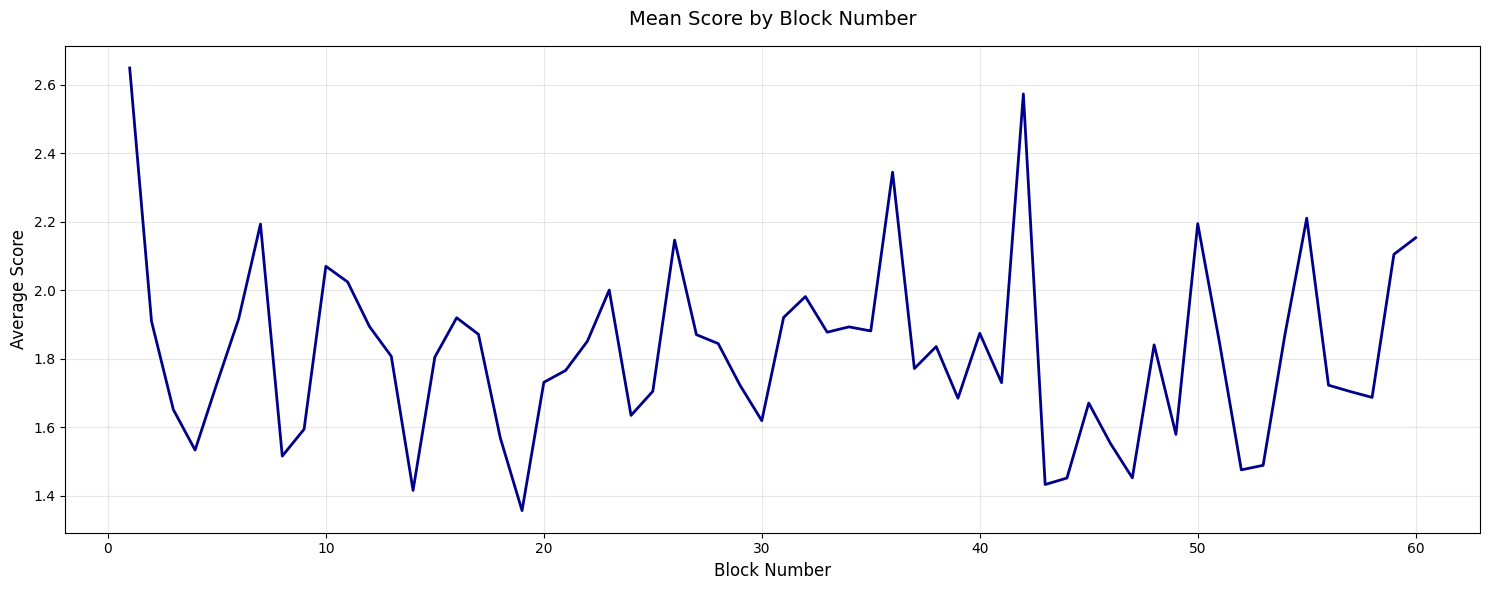

In [18]:
import matplotlib.pyplot as plt

score_by_block = tidy_crowdsourced_data.groupby('block_num')['score'].mean()

plt.figure(figsize=(15,6))
plt.plot(score_by_block.index, score_by_block.values, color='darkblue', linewidth=2)
plt.title('Mean Score by Block Number', fontsize=14, pad=15)
plt.xlabel('Block Number', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

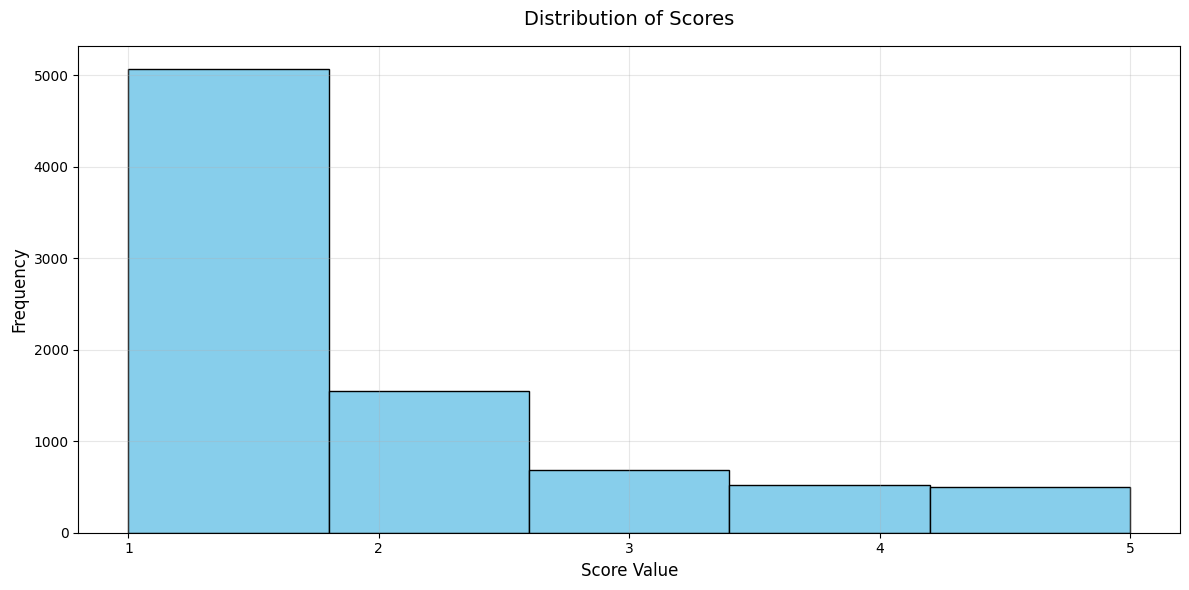

In [19]:
plt.figure(figsize=(12,6))
plt.hist(tidy_crowdsourced_data['score'], bins=5, color='skyblue', edgecolor='black')
plt.title('Distribution of Scores', fontsize=14, pad=15)
plt.xlabel('Score Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(range(1,6))
plt.tight_layout()
plt.show()

# 2 ) Overall Mean Per Label and Per Block+QID

In [20]:
def values_wide_with_stats(df_tidy: pd.DataFrame) -> pd.DataFrame:
    """
    group_by: 'label' or 'blockqid'
    """
    df = df_tidy.copy()
    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score", "label"])
    df["label"] = df["label"].astype(str).str.strip()
    df["block_num"] = pd.to_numeric(df["block_num"], errors="coerce")
    df["qid"] = pd.to_numeric(df["qid"], errors="coerce")
    group_cols = ["block_num","qid","label"]
    index_cols = group_cols

    df["_seq"] = df.groupby(group_cols).cumcount() + 1
    wide = df.pivot_table(index=index_cols, columns="_seq", values="score", aggfunc="first")
    wide.columns = [f"value_{int(c)}" for c in wide.columns]
    wide = wide.reset_index()
    val_cols = [c for c in wide.columns if c.startswith("value_")]
    wide["mean_score"] = wide[val_cols].mean(axis=1, skipna=True)
    wide["sd_score"] = wide[val_cols].std(axis=1, ddof=0, skipna=True)
    return wide

In [21]:
CANON_WORDS = [
    "Ladder",
    "Ladder",
    "Glasses",
    "Glasses",
    "Glasses",
    "Glasses",
    "Pine Tree",
    "Butterfly",
    "Butterfly",
    "Comb - Pitchfork",
    "Comb - Pitchfork",
    "Goblet",
    "Goblet",
    "Computer Mouse",
    "House",
    "Ice cream",
    "Ice cream",
    "Ice cream",
    "Computer Mouse",
    "Crystal ball - Person Outline",
    "Crystal ball - Person Outline",
    "Fish",
    "Lollipop",
    "Chair",
    "Chair",
    "Flag",
    "Door",
    "Glasses",
    "Shovel",
    "Fish bones",
    "Balloon",
    "Goblet",
    "Plunger",
    "Bow tie - Owl",
    "Bow tie - Owl",
    "Broom",
    "Clubs symbol",
    "Clubs symbol - Ice cream",
    "Clubs symbol - Ice cream",
    "Mug",
    "Mug",
    "Window - Grid",
    "Mouse",
    "Computer Mouse",
    "Clock",
    "Lightbulb - Ice Cream",
    "Computer Mouse",
    "Letter T",
    "Heart",
    "Stick Figure",
    "Television",
    "Letter F",
    "Sailboat",
    "Music Note",
    "Yield Sign - Martini Glass",
    "Clock",
    "Hourglass",
    "Umbrella",
    "Pine tree",
    "House",
]

In [22]:
def add_canon_between_qid_label(df: pd.DataFrame) -> pd.DataFrame:
    df2 = df.copy()
    if "block_num" not in df2.columns:
        raise ValueError("add_canon_between_qid_label: requires a 'block_num' column.")
    df2["block_num"] = pd.to_numeric(df2["block_num"], errors="coerce")
    mapping = {i+1: w for i, w in enumerate(CANON_WORDS)}
    df2["canon"] = df2["block_num"].map(mapping)
    if "qid" in df2.columns and "label" in df2.columns:
        cols = []
        for c in df2.columns:
            cols.append(c)
            if c == "qid":
                cols.append("canon")
        seen, ordered = set(), []
        for c in cols:
            if c not in seen:
                seen.add(c); ordered.append(c)
        df2 = df2[ordered]
    return df2

In [23]:
means_per_block_qid = values_wide_with_stats(tidy_crowdsourced_data)
means_with_canon = add_canon_between_qid_label(means_per_block_qid)
means_with_canon

,block_num,qid,canon,label,value_1,value_2,value_3,value_4,value_5,value_6,value_7,mean_score,sd_score
0,1,1,Ladder,door knob,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.000000,0.000000
1,1,2,Ladder,ladder,5.0,5.0,5.0,5.0,5.0,5.0,NaN,5.000000,0.000000
2,1,3,Ladder,stacked H's,4.0,2.0,3.0,3.0,1.0,3.0,NaN,2.666667,0.942809
3,1,4,Ladder,tower,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.571429,1.049781
4,1,5,Ladder,train track,4.0,3.0,2.0,5.0,4.0,4.0,NaN,3.666667,0.942809
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,60,1376,House,party hat,2.0,3.0,2.0,2.0,1.0,2.0,NaN,2.000000,0.577350
1376,60,1377,House,roof,2.0,3.0,1.0,2.0,4.0,3.0,NaN,2.500000,0.957427
1377,60,1378,House,television,1.0,1.0,1.0,2.0,1.0,1.0,NaN,1.166667,0.372678
1378,60,1379,House,trapezium,1.0,3.0,2.0,2.0,1.0,2.0,NaN,1.833333,0.687184


In [24]:
means_with_canon.to_csv("output_csvs/means_with_canon.csv")

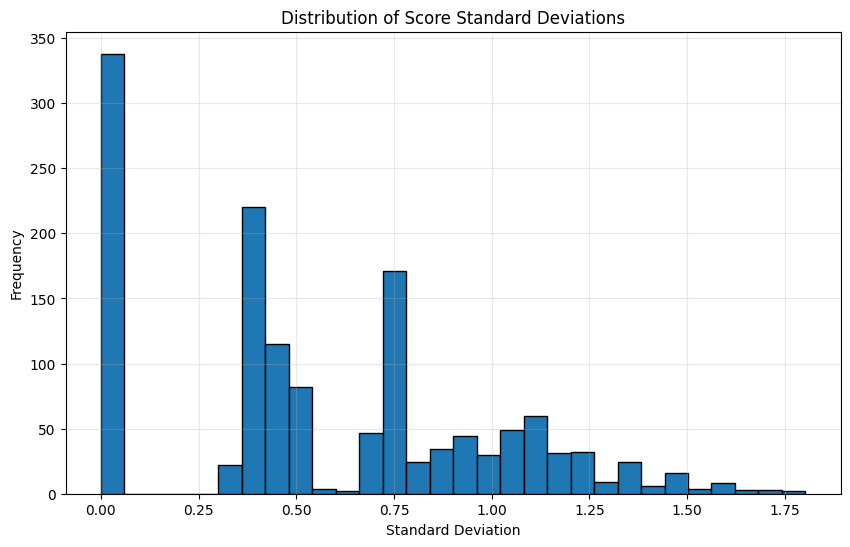

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['sd_score'], bins=30, edgecolor='black')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.title('Distribution of Score Standard Deviations')
plt.grid(True, alpha=0.3)

plt.show()

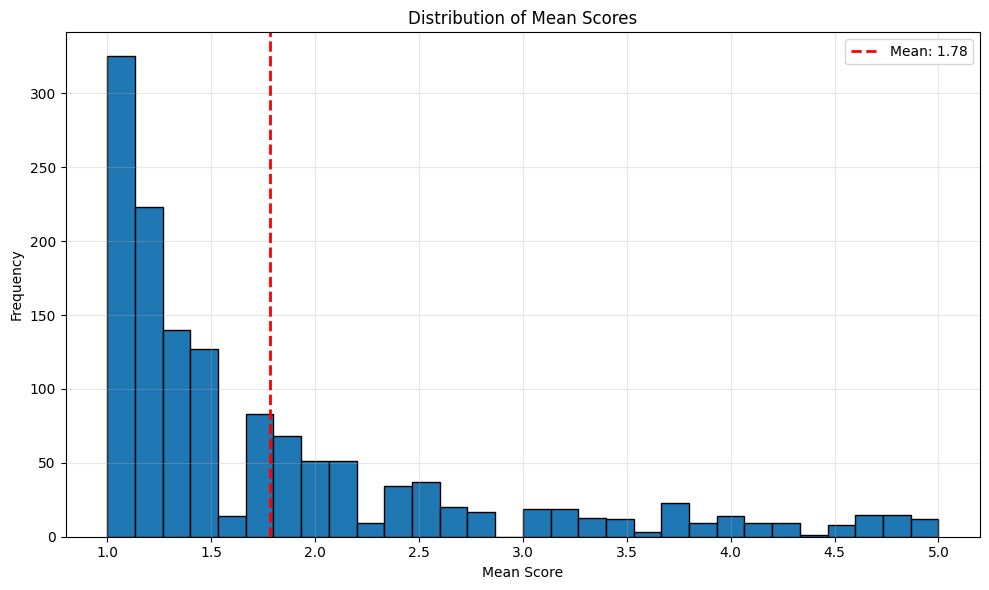

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(means_with_canon['mean_score'], bins=30, edgecolor='black')
plt.axvline(means_with_canon['mean_score'].mean(), color='red', linestyle='dashed',
           linewidth=2, label=f'Mean: {means_with_canon["mean_score"].mean():.2f}')
plt.xlabel('Mean Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Scores')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3 ) VVIQ Scores

In [27]:
def extract_leading_number(series: pd.Series) -> pd.Series:
    """
    From strings like '1 Very vivid' or '  4 - Barely vivid',
    extract the leading integer. Returns float with NaN on failure.
    """
    s = series.astype(str)
    # grab the first integer at the start of the string
    nums = s.str.extract(r'^\s*(\d+)')[0]
    return pd.to_numeric(nums, errors="coerce")

In [28]:
def get_vviq_scores(df: pd.DataFrame) -> pd.DataFrame:
    vviq_column_regex = r'^VVIQ\s*[-–]\s*\d{2}$'
    vviq_columns = [c for c in df.columns if re.match(vviq_column_regex, c)]
    if not vviq_columns:
        raise ValueError("get_VVIQ_scores: no vviq columns")
    vviq_numeric = pd.DataFrame(
        {c: extract_leading_number(df[c]) for c in vviq_columns}
    )
    base = df[['ResponseId']].copy()
    scored = pd.concat([base, vviq_numeric], axis=1)
    scored.insert(loc=1,column='VVIQ_sum', value=vviq_numeric.sum(axis=1, min_count=1))
    scored.insert(loc=2,column='VVIQ_mean', value=vviq_numeric.mean(axis=1))
    scored.insert(loc=3,column='VVIQ_std', value=vviq_numeric.std(axis=1, ddof=1))
    return scored

In [29]:
pre_vviq = human_data.reset_index(drop=True)
vviq_scores = get_vviq_scores(pre_vviq)
vviq_scores

,ResponseId,VVIQ_sum,VVIQ_mean,VVIQ_std,VVIQ - 01,VVIQ - 02,VVIQ - 03,VVIQ - 04,VVIQ - 05,VVIQ - 06,VVIQ - 07,VVIQ - 08,VVIQ - 09,VVIQ - 10,VVIQ - 11,VVIQ - 12,VVIQ - 13,VVIQ - 14,VVIQ - 15,VVIQ - 16
0,R_5vQ6Xf1WugueDND,70,4.3750,0.718795,3,4,3,4,4,5,5,5,5,5,4,4,5,5,5,4
1,R_6D6PBkrChss508l,71,4.4375,0.629153,5,4,5,5,4,5,5,4,4,4,3,5,5,5,4,4
2,R_53qZezuj1Aowmel,49,3.0625,0.928709,4,3,2,4,3,4,5,2,2,2,3,3,3,4,3,2
3,R_6hazd14Iv0vRJV7,56,3.5000,1.825742,1,1,4,3,5,5,5,5,1,1,4,1,5,5,5,5
4,R_5KpdGyLKCFDJS5r,61,3.8125,1.515201,4,2,1,3,5,5,5,5,5,5,2,5,1,5,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,R_6RqfSAN0DF8nnsa,63,3.9375,0.771902,4,4,3,4,4,4,5,5,5,5,4,3,3,3,3,4
96,R_1paSSMOwVWpJyn2,53,3.3125,0.793200,3,3,2,2,4,4,4,4,3,3,2,3,4,4,4,4
97,R_7NhDTJ2fxewY5qh,53,3.3125,1.014479,2,3,1,4,3,4,4,4,2,3,4,4,3,4,5,3
98,R_5RvyCf53JoQh7Eg,71,4.4375,0.629153,4,4,3,4,5,5,5,5,4,4,5,4,5,5,5,4


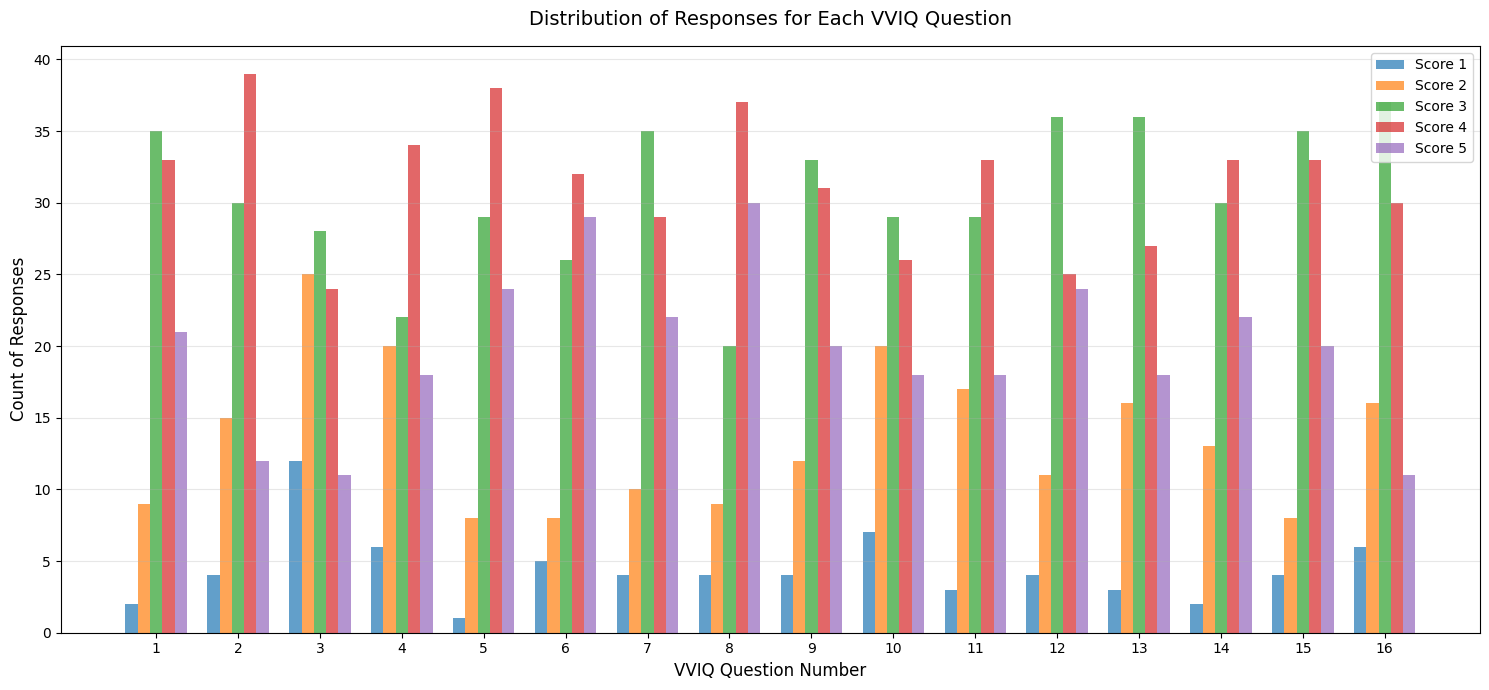

In [30]:
response_counts = {i: [len(vviq_scores[vviq_scores[f'VVIQ - {str(j).zfill(2)}'] == i])
                      for j in range(1,17)] for i in range(1,6)}

x = np.arange(1,17)
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(15,7))

for response, counts in response_counts.items():
    offset = width * multiplier
    ax.bar(x + offset, counts, width, label=f'Score {response}', alpha=0.7)
    multiplier += 1

ax.set_xlabel('VVIQ Question Number', fontsize=12)
ax.set_ylabel('Count of Responses', fontsize=12)
ax.set_title('Distribution of Responses for Each VVIQ Question', fontsize=14, pad=15)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(range(1,17))
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

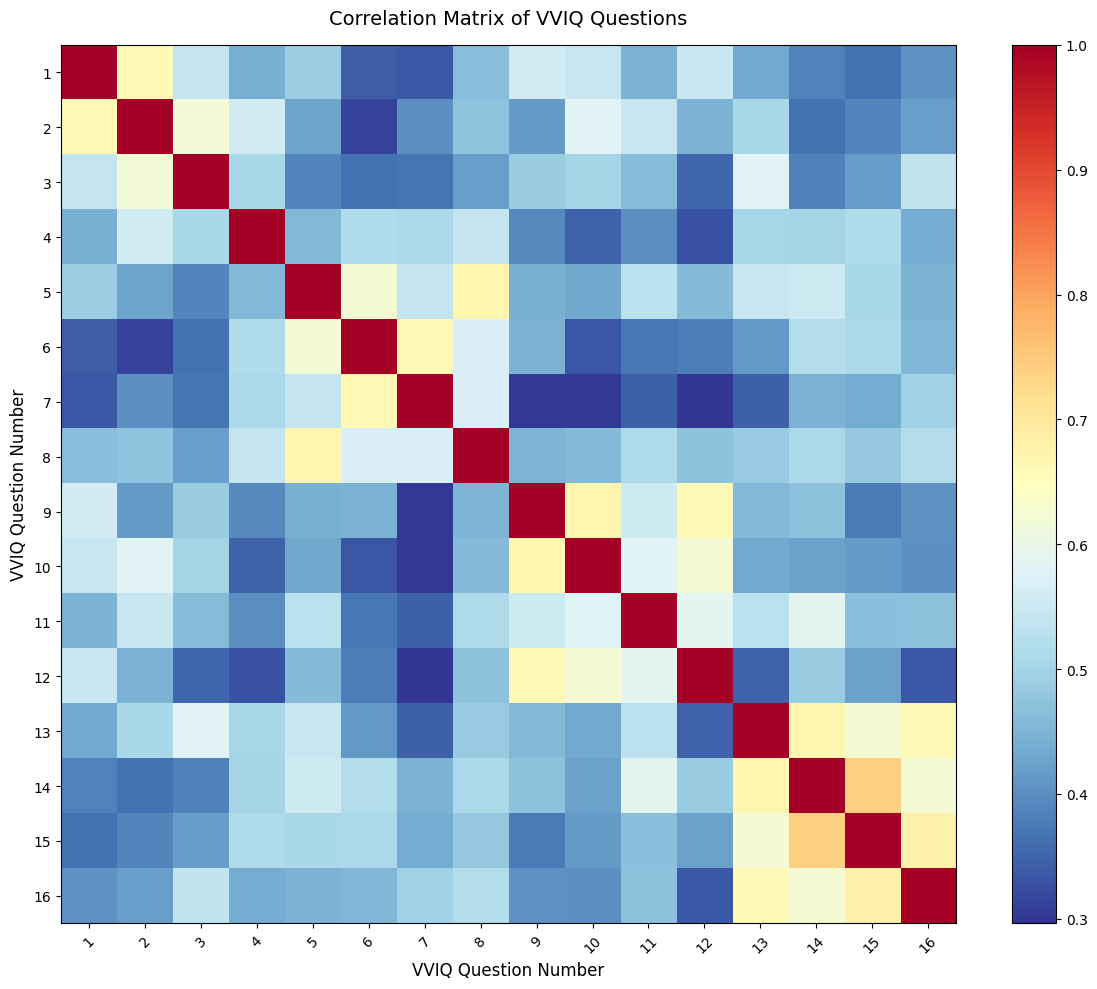

In [31]:
correlations = vviq_scores[[f'VVIQ - {str(i).zfill(2)}' for i in range(1,17)]].corr()

plt.figure(figsize=(12,10))
im = plt.imshow(correlations, cmap='RdYlBu_r', aspect='auto')
plt.colorbar(im)
plt.xticks(range(16), range(1,17), rotation=45)
plt.yticks(range(16), range(1,17))
plt.xlabel('VVIQ Question Number', fontsize=12)
plt.ylabel('VVIQ Question Number', fontsize=12)
plt.title('Correlation Matrix of VVIQ Questions', fontsize=14, pad=15)
plt.tight_layout()
plt.show()

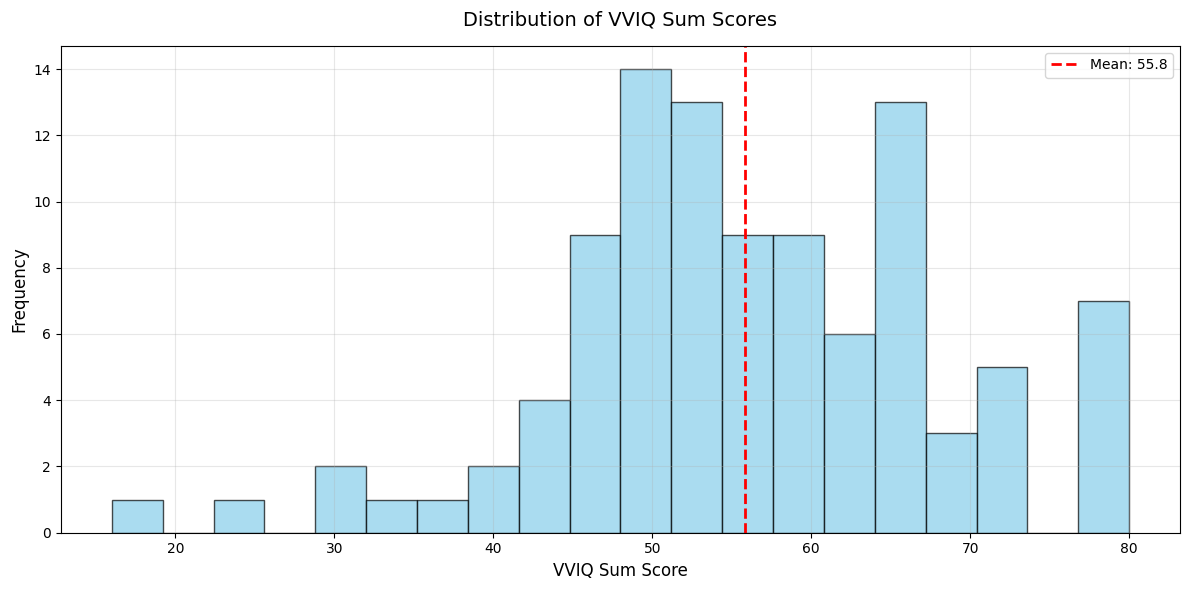

In [32]:
plt.figure(figsize=(12,6))
plt.hist(vviq_scores['VVIQ_sum'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.axvline(vviq_scores['VVIQ_sum'].mean(), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {vviq_scores["VVIQ_sum"].mean():.1f}')
plt.xlabel('VVIQ Sum Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of VVIQ Sum Scores', fontsize=14, pad=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
vviq_scores.to_csv("output_csvs/vviq_scores.csv")

# 4) Grading

In [34]:
def norm_text(s: str) -> str:
    """Lowercase + strip + collapse internal whitespace. Returns '' for None/NaN."""
    if s is None:
        return ""
    s = str(s).strip().lower()
    return re.sub(r"\s+", " ", s)

def parse_block(col_name: str):
    """
    Extract leading block number from a header.
      '01' -> 1
      '01 - Block' -> 1
      '5_block' -> 5
      '060 final' -> 60
    Returns int in 1..60 or None.
    """
    m = re.match(r'^\s*0*(\d+)', str(col_name))
    if not m:
        return None
    bnum = int(m.group(1))
    return bnum if 1 <= bnum <= 60 else None


In [35]:
def sort_blocks(df):
    block_cols = []
    for i, col in enumerate(df.columns):
        if col == 'ResponseId' or col == 'Model':
            continue
        bnum = parse_block(col)
        if bnum is not None:
            block_cols.append((col, bnum, i))
    block_cols.sort(key=lambda t: t[2])  # preserve file order
    return block_cols

In [36]:
def build_lookup(df):
    new_df = pd.DataFrame()
    new_df["_block_num"]  = pd.to_numeric(df["block_num"], errors="coerce")
    new_df["_label_norm"] = df["label"].map(norm_text)
    new_df["_mean_score"] = pd.to_numeric(df["mean_score"], errors="coerce")
    new_df["_mc1"] = pd.to_numeric(df["value_1"], errors="coerce")
    new_df["_mc2"] = pd.to_numeric(df["value_2"], errors="coerce")
    new_df["_mc3"] = pd.to_numeric(df["value_3"], errors="coerce")
    new_df["_mc4"] = pd.to_numeric(df["value_4"], errors="coerce")
    new_df["_mc5"] = pd.to_numeric(df["value_5"], errors="coerce")
    new_df["_mc6"] = pd.to_numeric(df["value_6"], errors="coerce")
    new_df["_mc7"] = pd.to_numeric(df["value_7"], errors="coerce")
    return {(int(b), l): [float(m), float(mc1), float(mc2), float(mc3), float(mc4), float(mc5), float(mc6), float(mc7)] for b, l, m, mc1, mc2, mc3, mc4, mc5, mc6, mc7 in new_df.itertuples(index=False, name=None)}

In [37]:
def grade(responses_df, means_df, key_col) -> pd.DataFrame:
    usable_means = build_lookup(means_df)
    block_cols = sort_blocks(responses_df)
    result_list = []
    full_results = []
    for _, row in responses_df.iterrows():
        key_val = row[key_col]
        total = 0.0
        n_graded = 0
        for col, bnum, _ in block_cols:
            label_original = str(row.get(col, "")).strip()
            if label_original == "nan":
                continue
            label_norm = norm_text(label_original)
            mean_with_components = usable_means.get((bnum, label_norm))
            if mean_with_components is None:
                continue
            else:
                total += mean_with_components[0]
                n_graded += 1
                full_results.append(
                    {key_col: key_val,
                     "label": label_norm,
                     "mean": mean_with_components[0],
                     "ranking_1": mean_with_components[1],
                     "ranking_2": mean_with_components[2],
                     "ranking_3": mean_with_components[3],
                     "ranking_4": mean_with_components[4],
                     "ranking_5": mean_with_components[5],
                     "ranking_6": mean_with_components[6],
                     "ranking_7": mean_with_components[7],
                     })

        result_list.append({key_col: key_val, "overall_score": total, "n_graded": n_graded})
    return pd.DataFrame(result_list), pd.DataFrame(full_results)

In [38]:
graded_results, full_results = grade(human_data, means_with_canon, "ResponseId")

In [39]:
graded_results

,ResponseId,overall_score,n_graded
0,R_5vQ6Xf1WugueDND,28.261905,14
1,R_6D6PBkrChss508l,28.166667,13
2,R_53qZezuj1Aowmel,25.142857,15
3,R_6hazd14Iv0vRJV7,28.380952,15
4,R_5KpdGyLKCFDJS5r,28.476190,15
...,...,...,...
95,R_6RqfSAN0DF8nnsa,44.576190,15
96,R_1paSSMOwVWpJyn2,46.285714,15
97,R_7NhDTJ2fxewY5qh,34.366667,15
98,R_5RvyCf53JoQh7Eg,41.180952,13


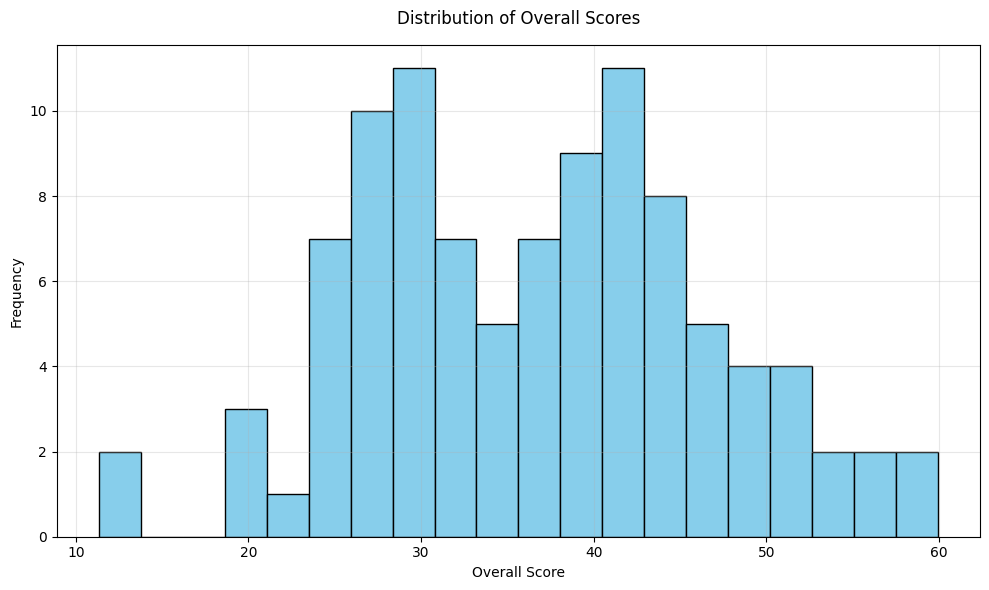

In [40]:
plt.figure(figsize=(10,6))
plt.hist(graded_results['overall_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Scores', pad=15, fontsize=12)
plt.xlabel('Overall Score', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

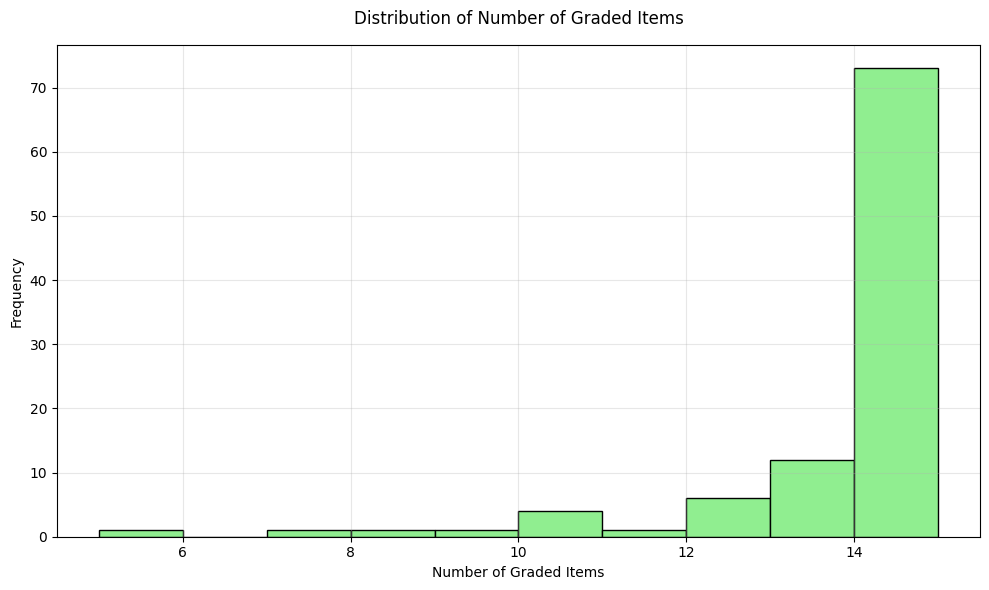

In [41]:
plt.figure(figsize=(10,6))
plt.hist(graded_results['n_graded'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Number of Graded Items', pad=15, fontsize=12)
plt.xlabel('Number of Graded Items', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
full_results

,ResponseId,label,mean,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,ranking_7
0,R_5vQ6Xf1WugueDND,two chairs,1.666667,1.0,1.0,3.0,2.0,2.0,1.0,NaN
1,R_5vQ6Xf1WugueDND,swimming,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN
2,R_5vQ6Xf1WugueDND,cup,1.166667,1.0,1.0,1.0,2.0,1.0,1.0,NaN
3,R_5vQ6Xf1WugueDND,letter j,1.833333,4.0,1.0,1.0,2.0,1.0,2.0,NaN
4,R_5vQ6Xf1WugueDND,triangle,1.500000,1.0,3.0,2.0,1.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1379,R_6YaCnTxmrtmyBmt,cup,4.333333,4.0,4.0,4.0,5.0,5.0,4.0,NaN
1380,R_6YaCnTxmrtmyBmt,gate,1.666667,1.0,1.0,2.0,2.0,2.0,2.0,NaN
1381,R_6YaCnTxmrtmyBmt,present,2.833333,1.0,5.0,2.0,3.0,3.0,3.0,NaN
1382,R_6YaCnTxmrtmyBmt,lottery ball,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [43]:
graded_results.to_csv("output_csvs/graded_results.csv")
full_results.to_csv("output_csvs/full_results.csv")